## Project: RBI Governor Speech Texts - Sentiment Analysis

### Introduction
RBI Governor Speech Texts Sentiment Analysis is the project on web scraping, text pre-processing and normalization, data visualization and sentiment analysis using data provided by [RBI](https://www.rbi.org.in/Scripts/BS_ViewSpeeches.aspx). Used various python tools and libraries to perform sentiment analysis over a speech texts by RBI governor.

In [1]:
from bs4 import BeautifulSoup # extracting speech text from HTML doc
import nltk # for pre-processing text
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from textblob import TextBlob # for sentiment analysis

import string
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from wordcloud import WordCloud
import seaborn as sns
sns.set_context('notebook')

### Extracting text from markup like HTML document formats for each speech

In [14]:
htmlfile = open('RBI_governor_speech/Raghuram_rajan/Reserve Bank of India - Speeches_1.htm', encoding="utf8").read()

soup = BeautifulSoup(htmlfile)

for speech_text_1 in soup.findAll(attrs={'class' : 'tablecontent2'}):
    speech_text_1 = speech_text_1.text.strip()
    
    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in speech_text_1.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    speech_1 = '\n'.join(chunk for chunk in chunks if chunk)
    
print(speech_1)

The
global economy is still weak, despite a strengthening
recovery in the United
States. The Euro area is veering close to
recession, Japan has already
experienced two quarters of negative
growth after a tax hike, and many emerging
markets are rethinking their
export-led growth models as the industrial world
stagnates. In the
last couple of years, the IMF has repeatedly reduced its
growth
forecasts. After 6 years of a tepid post-crisis recovery, the IMF titled
its most recent World Economic Outlook “Legacies, Clouds,
Uncertainties”.
The conventional diagnosis and remedy
Why
is the world finding it so hard to resume pre-Great
Recession growth rates, let
alone restore the levels of GDP that would
have been attained if the Great
Recession had not happened? The obvious
answer is that the legacy of the
financial boom that preceded the
Great Recession is debt, and the overhang of
debt, whether on
governments, households, or banks, is holding back growth. In
the
colourful words of the IMF’s M

In [15]:
htmlfile = open('RBI_governor_speech/Raghuram_rajan/Reserve Bank of India - Speeches_2.htm', encoding="utf8").read()

soup = BeautifulSoup(htmlfile)

for speech_text_2 in soup.findAll(attrs={'class' : 'tablecontent2'}):
    speech_text_2 = speech_text_2.text.strip()
    
    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in speech_text_2.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    speech_2 = '\n'.join(chunk for chunk in chunks if chunk)
    
print(speech_2)

Thank
you for inviting me to speak to FEDAI. In the last few weeks, in
successive speeches, I have outlined the RBI’s approach to inflation,
distressed debt, financial inclusion, and banking sector reform. I want
to speak today about debt markets and associated derivatives; why we
need them to be deep and liquid, why, in addition to central and state
governments, we need riskier firms and projects to be able to access the
bond markets for funds, why we need to encourage product innovation,
and finally the dilemmas that regulators like the RBI face. In the
process, I hope to touch on some of our recent successes, as well as
failures, and our ambitions for the future. There are three
important reasons why debt markets have become a lot more attractive in
recent months. First, we finally have a framework that commits us to low
and stable inflation. Yes, July’s inflation reading was a high 6.07%,
but I have no doubt that inflation will fall in the months ahead. The
key point is that market

In [16]:
htmlfile = open('RBI_governor_speech/Raghuram_rajan/Reserve Bank of India - Speeches_3.htm', encoding="utf8").read()

soup = BeautifulSoup(htmlfile)

for speech_text_3 in soup.findAll(attrs={'class' : 'tablecontent2'}):
    speech_text_3 = speech_text_3.text.strip()
    
    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in speech_text_3.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    speech_3 = '\n'.join(chunk for chunk in chunks if chunk)
    
print(speech_3)

Thank
you very much for inviting me to give this talk. Ordinarily, in a city
like Bengaluru, we would talk about startups. Today, however, I want to
talk about the resolution of financial distress. I will argue that the
slowdown in credit growth has been largely because of stress in the
public sector banking and not because of high interest rates. As such,
what is required is a clean-up of the balance sheets of public sector
banks, which is what is underway and needs to be taken to its logical
conclusion.  Specifically, I will describe what we have been doing
in India to change the culture surrounding the loan contract. To start,
let us look at public sector credit growth compared with the growth in
credit by the new private banks.
Public Sector Lending vs Private Sector Lending As chart 1
(Credit in India) shows, public sector bank non-food credit growth has
been falling relative to credit growth from the new private sector banks
(Axis, HDFC, ICICI, and IndusInd) since early 2014. Thi

In [17]:
# Combining all three speech texts into one 
raghuram_rajan_speeches = (speech_1 +"\n"+ speech_2 +"\n"+ speech_3)
print(raghuram_rajan_speeches)

The
global economy is still weak, despite a strengthening
recovery in the United
States. The Euro area is veering close to
recession, Japan has already
experienced two quarters of negative
growth after a tax hike, and many emerging
markets are rethinking their
export-led growth models as the industrial world
stagnates. In the
last couple of years, the IMF has repeatedly reduced its
growth
forecasts. After 6 years of a tepid post-crisis recovery, the IMF titled
its most recent World Economic Outlook “Legacies, Clouds,
Uncertainties”.
The conventional diagnosis and remedy
Why
is the world finding it so hard to resume pre-Great
Recession growth rates, let
alone restore the levels of GDP that would
have been attained if the Great
Recession had not happened? The obvious
answer is that the legacy of the
financial boom that preceded the
Great Recession is debt, and the overhang of
debt, whether on
governments, households, or banks, is holding back growth. In
the
colourful words of the IMF’s M

## Text Analysis Operations using NLTK

In [18]:
# Lets break text paragraphs into sentences

tokenized_text=sent_tokenize(raghuram_rajan_speeches)
print(tokenized_text)

['The\nglobal economy is still weak, despite a strengthening\nrecovery in the United\nStates.', 'The Euro area is veering close to\nrecession, Japan has already\nexperienced two quarters of negative\ngrowth after a tax hike, and many emerging\nmarkets are rethinking their\nexport-led growth models as the industrial world\nstagnates.', 'In the\nlast couple of years, the IMF has repeatedly reduced its\ngrowth\nforecasts.', 'After 6 years of a tepid post-crisis recovery, the IMF titled\nits most recent World Economic Outlook “Legacies, Clouds,\nUncertainties”.', 'The conventional diagnosis and remedy\nWhy\nis the world finding it so hard to resume pre-Great\nRecession growth rates, let\nalone restore the levels of GDP that would\nhave been attained if the Great\nRecession had not happened?', 'The obvious\nanswer is that the legacy of the\nfinancial boom that preceded the\nGreat Recession is debt, and the overhang of\ndebt, whether on\ngovernments, households, or banks, is holding back gro

In [20]:
# Word tokenizer breaks text paragraph into words.

tokenized_word=word_tokenize(raghuram_rajan_speeches)
print(tokenized_word)

['The', 'global', 'economy', 'is', 'still', 'weak', ',', 'despite', 'a', 'strengthening', 'recovery', 'in', 'the', 'United', 'States', '.', 'The', 'Euro', 'area', 'is', 'veering', 'close', 'to', 'recession', ',', 'Japan', 'has', 'already', 'experienced', 'two', 'quarters', 'of', 'negative', 'growth', 'after', 'a', 'tax', 'hike', ',', 'and', 'many', 'emerging', 'markets', 'are', 'rethinking', 'their', 'export-led', 'growth', 'models', 'as', 'the', 'industrial', 'world', 'stagnates', '.', 'In', 'the', 'last', 'couple', 'of', 'years', ',', 'the', 'IMF', 'has', 'repeatedly', 'reduced', 'its', 'growth', 'forecasts', '.', 'After', '6', 'years', 'of', 'a', 'tepid', 'post-crisis', 'recovery', ',', 'the', 'IMF', 'titled', 'its', 'most', 'recent', 'World', 'Economic', 'Outlook', '“', 'Legacies', ',', 'Clouds', ',', 'Uncertainties', '”', '.', 'The', 'conventional', 'diagnosis', 'and', 'remedy', 'Why', 'is', 'the', 'world', 'finding', 'it', 'so', 'hard', 'to', 'resume', 'pre-Great', 'Recession', '

In [21]:
# lets find Frequency Distribution of each words

fdist = FreqDist(tokenized_word)
print(fdist)

<FreqDist with 2726 samples and 13183 outcomes>


In [22]:
fdist.most_common(5)

[(',', 710), ('the', 599), ('.', 511), ('to', 434), ('of', 281)]

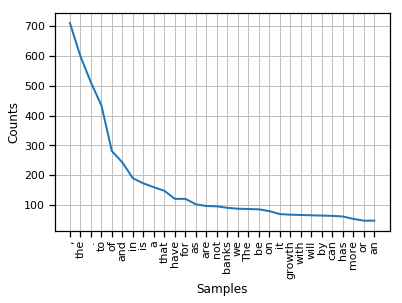

In [23]:
# Frequency Distribution Plot

fdist.plot(30,cumulative=False)
plt.show()

In [24]:
# Stopwords considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc.

stop_words=set(stopwords.words("english"))
print(stop_words)

{'below', 'haven', 'shouldn', "haven't", 'after', 'not', 'of', 'mightn', 'having', 'out', 'needn', 'as', "mightn't", "needn't", 'don', 'yourself', "won't", 'doesn', 'are', 'ourselves', 'up', "mustn't", 'further', 'itself', 'so', 'am', 'to', 'it', 'then', 'only', "shan't", 'at', "she's", 'an', 'his', 'she', 'than', "aren't", 'whom', 't', 'y', 'any', 'from', 'other', 'those', 'into', 'over', 'each', 'o', 'nor', 'who', 'i', 'because', 'down', 'no', 'above', 'while', 'here', 'through', 'her', 'been', 'until', 'hasn', 'doing', 'again', 'wasn', 'very', 'will', 'myself', 'him', 'all', 'how', 'can', 'them', 'where', 'herself', 'what', 'they', "hasn't", 'themselves', 'do', 'were', 'if', 'wouldn', "that'll", 'won', 'its', 'under', 'your', 'more', 'isn', 'm', 'or', 'this', 'd', "you'll", 'have', 'on', 'ma', "didn't", 'me', 'in', 'too', 'there', "wasn't", 'did', "shouldn't", 'by', 'for', "isn't", 'my', 'does', 'same', 'against', 'yourselves', 'being', "doesn't", 'before', 'which', 'but', "it's", '

In [25]:
# Removing Stopwords
filtered_word=[]
for w in tokenized_word:
    if w not in stop_words:
        filtered_word.append(w)
print("Tokenized Words:",tokenized_word[:100])
print("Filterd Words:",filtered_word[:100])

Tokenized Words: ['The', 'global', 'economy', 'is', 'still', 'weak', ',', 'despite', 'a', 'strengthening', 'recovery', 'in', 'the', 'United', 'States', '.', 'The', 'Euro', 'area', 'is', 'veering', 'close', 'to', 'recession', ',', 'Japan', 'has', 'already', 'experienced', 'two', 'quarters', 'of', 'negative', 'growth', 'after', 'a', 'tax', 'hike', ',', 'and', 'many', 'emerging', 'markets', 'are', 'rethinking', 'their', 'export-led', 'growth', 'models', 'as', 'the', 'industrial', 'world', 'stagnates', '.', 'In', 'the', 'last', 'couple', 'of', 'years', ',', 'the', 'IMF', 'has', 'repeatedly', 'reduced', 'its', 'growth', 'forecasts', '.', 'After', '6', 'years', 'of', 'a', 'tepid', 'post-crisis', 'recovery', ',', 'the', 'IMF', 'titled', 'its', 'most', 'recent', 'World', 'Economic', 'Outlook', '“', 'Legacies', ',', 'Clouds', ',', 'Uncertainties', '”', '.', 'The', 'conventional', 'diagnosis']
Filterd Words: ['The', 'global', 'economy', 'still', 'weak', ',', 'despite', 'strengthening', 'recovery

In [26]:
# lets find Frequency Distribution of filtered words

fdist = FreqDist(filtered_word)
print(fdist)

<FreqDist with 2613 samples and 8389 outcomes>


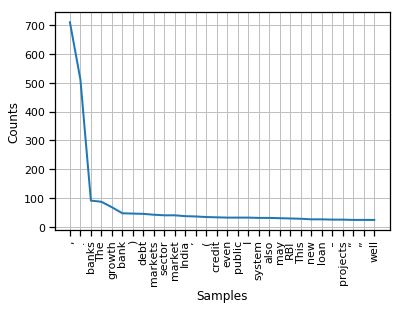

In [27]:
fdist.plot(30,cumulative=False)
plt.show()

In [28]:
# Lets get rid of the punctuation
# Python provides a constant called string.punctuation that provides a great list of punctuation characters.
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in filtered_word]
print(stripped[:200])

['The', 'global', 'economy', 'still', 'weak', '', 'despite', 'strengthening', 'recovery', 'United', 'States', '', 'The', 'Euro', 'area', 'veering', 'close', 'recession', '', 'Japan', 'already', 'experienced', 'two', 'quarters', 'negative', 'growth', 'tax', 'hike', '', 'many', 'emerging', 'markets', 'rethinking', 'exportled', 'growth', 'models', 'industrial', 'world', 'stagnates', '', 'In', 'last', 'couple', 'years', '', 'IMF', 'repeatedly', 'reduced', 'growth', 'forecasts', '', 'After', '6', 'years', 'tepid', 'postcrisis', 'recovery', '', 'IMF', 'titled', 'recent', 'World', 'Economic', 'Outlook', '“', 'Legacies', '', 'Clouds', '', 'Uncertainties', '”', '', 'The', 'conventional', 'diagnosis', 'remedy', 'Why', 'world', 'finding', 'hard', 'resume', 'preGreat', 'Recession', 'growth', 'rates', '', 'let', 'alone', 'restore', 'levels', 'GDP', 'would', 'attained', 'Great', 'Recession', 'happened', '', 'The', 'obvious', 'answer', 'legacy', 'financial', 'boom', 'preceded', 'Great', 'Recession', 

In [29]:
# remove all tokens that are not alphabetic
filtered_words = [word for word in stripped if word.isalpha()]
print(filtered_words[:100])

['The', 'global', 'economy', 'still', 'weak', 'despite', 'strengthening', 'recovery', 'United', 'States', 'The', 'Euro', 'area', 'veering', 'close', 'recession', 'Japan', 'already', 'experienced', 'two', 'quarters', 'negative', 'growth', 'tax', 'hike', 'many', 'emerging', 'markets', 'rethinking', 'exportled', 'growth', 'models', 'industrial', 'world', 'stagnates', 'In', 'last', 'couple', 'years', 'IMF', 'repeatedly', 'reduced', 'growth', 'forecasts', 'After', 'years', 'tepid', 'postcrisis', 'recovery', 'IMF', 'titled', 'recent', 'World', 'Economic', 'Outlook', 'Legacies', 'Clouds', 'Uncertainties', 'The', 'conventional', 'diagnosis', 'remedy', 'Why', 'world', 'finding', 'hard', 'resume', 'preGreat', 'Recession', 'growth', 'rates', 'let', 'alone', 'restore', 'levels', 'GDP', 'would', 'attained', 'Great', 'Recession', 'happened', 'The', 'obvious', 'answer', 'legacy', 'financial', 'boom', 'preceded', 'Great', 'Recession', 'debt', 'overhang', 'debt', 'whether', 'governments', 'households',

In [30]:
# lets find Frequency Distribution of filtered words

fdist = FreqDist(filtered_words)
print(fdist)

<FreqDist with 2554 samples and 6870 outcomes>


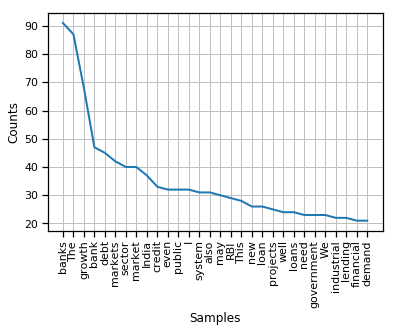

In [31]:
fdist.plot(30,cumulative=False)
plt.show()

#### Much better after removing stopwords and punctuation!

#### Lexicon Normalization


Lexicon normalization considers another type of noise in the text. For example, connection, connected, connecting word reduce to a common word "connect". It reduces derivationally related forms of a word to a common root word.

In [33]:
#Lexicon Normalization
#performing Stemming and Lemmatization
ps = PorterStemmer()

stemmed_words=[]
for w in filtered_words:
    stemmed_words.append(ps.stem(w))
    
print("Filtered Words:",filtered_words[:100])
print("Stemmed Words:",stemmed_words[:100])

Filtered Words: ['The', 'global', 'economy', 'still', 'weak', 'despite', 'strengthening', 'recovery', 'United', 'States', 'The', 'Euro', 'area', 'veering', 'close', 'recession', 'Japan', 'already', 'experienced', 'two', 'quarters', 'negative', 'growth', 'tax', 'hike', 'many', 'emerging', 'markets', 'rethinking', 'exportled', 'growth', 'models', 'industrial', 'world', 'stagnates', 'In', 'last', 'couple', 'years', 'IMF', 'repeatedly', 'reduced', 'growth', 'forecasts', 'After', 'years', 'tepid', 'postcrisis', 'recovery', 'IMF', 'titled', 'recent', 'World', 'Economic', 'Outlook', 'Legacies', 'Clouds', 'Uncertainties', 'The', 'conventional', 'diagnosis', 'remedy', 'Why', 'world', 'finding', 'hard', 'resume', 'preGreat', 'Recession', 'growth', 'rates', 'let', 'alone', 'restore', 'levels', 'GDP', 'would', 'attained', 'Great', 'Recession', 'happened', 'The', 'obvious', 'answer', 'legacy', 'financial', 'boom', 'preceded', 'Great', 'Recession', 'debt', 'overhang', 'debt', 'whether', 'governments

In [34]:
# Lets try Lemmatization
lem = WordNetLemmatizer()

lemma_words=[]
for w in filtered_words:
    lemma_words.append(lem.lemmatize(w))
    
print("Filtered Words:",filtered_words[:100])
print("Lemmatize Words:",lemma_words[:100])

Filtered Words: ['The', 'global', 'economy', 'still', 'weak', 'despite', 'strengthening', 'recovery', 'United', 'States', 'The', 'Euro', 'area', 'veering', 'close', 'recession', 'Japan', 'already', 'experienced', 'two', 'quarters', 'negative', 'growth', 'tax', 'hike', 'many', 'emerging', 'markets', 'rethinking', 'exportled', 'growth', 'models', 'industrial', 'world', 'stagnates', 'In', 'last', 'couple', 'years', 'IMF', 'repeatedly', 'reduced', 'growth', 'forecasts', 'After', 'years', 'tepid', 'postcrisis', 'recovery', 'IMF', 'titled', 'recent', 'World', 'Economic', 'Outlook', 'Legacies', 'Clouds', 'Uncertainties', 'The', 'conventional', 'diagnosis', 'remedy', 'Why', 'world', 'finding', 'hard', 'resume', 'preGreat', 'Recession', 'growth', 'rates', 'let', 'alone', 'restore', 'levels', 'GDP', 'would', 'attained', 'Great', 'Recession', 'happened', 'The', 'obvious', 'answer', 'legacy', 'financial', 'boom', 'preceded', 'Great', 'Recession', 'debt', 'overhang', 'debt', 'whether', 'governments

#### Much better after performing Lemmatization

In [37]:
print('Total number of words after text pre-processing :', len(lemma_words))

Total number of words after text pre-processing : 6870


### WordCloud for Raghuram Rajan Speech

#### Now Lets look at importance of each word frequency from Raghuram Rajan's speech using WordCloud
#### Which will help us to get insights about his Audience, for eg. Tenurity

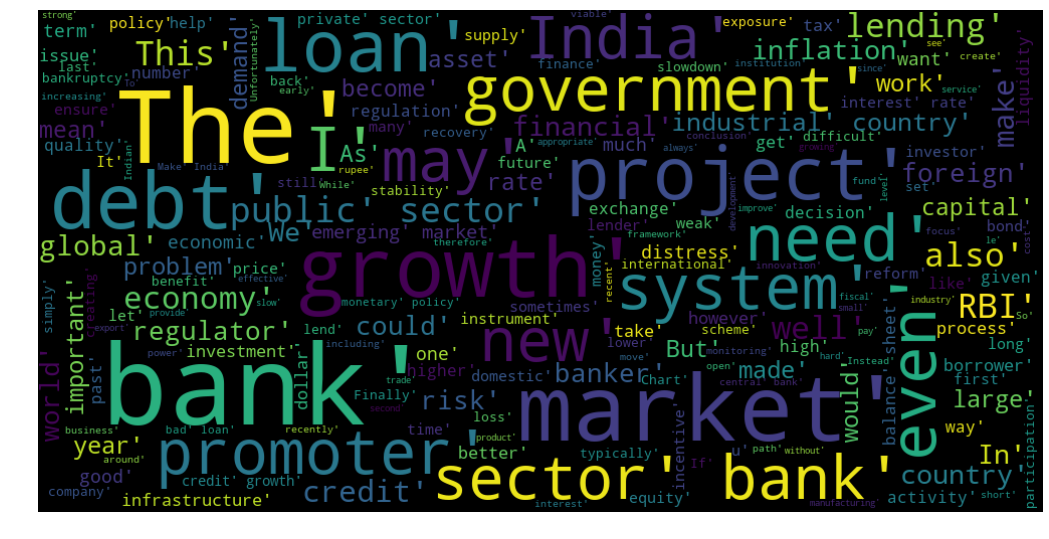

In [43]:
filtered_speech_words = str(lemma_words)

wordcloud = WordCloud(width=1000, height=500,
                      random_state=21, max_font_size=110).generate(filtered_speech_words)
plt.figure(figsize=(18, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

#### Great! We can say his speech is mostly focused on topics - Economy growth, Market, Public sector bank, Government, Loan, Debt etc.

#### Now lets plot most occurring words from Raghuram Rajan's speech

In [44]:
# Count all unique words

speech_word_counts = Counter(lemma_words)

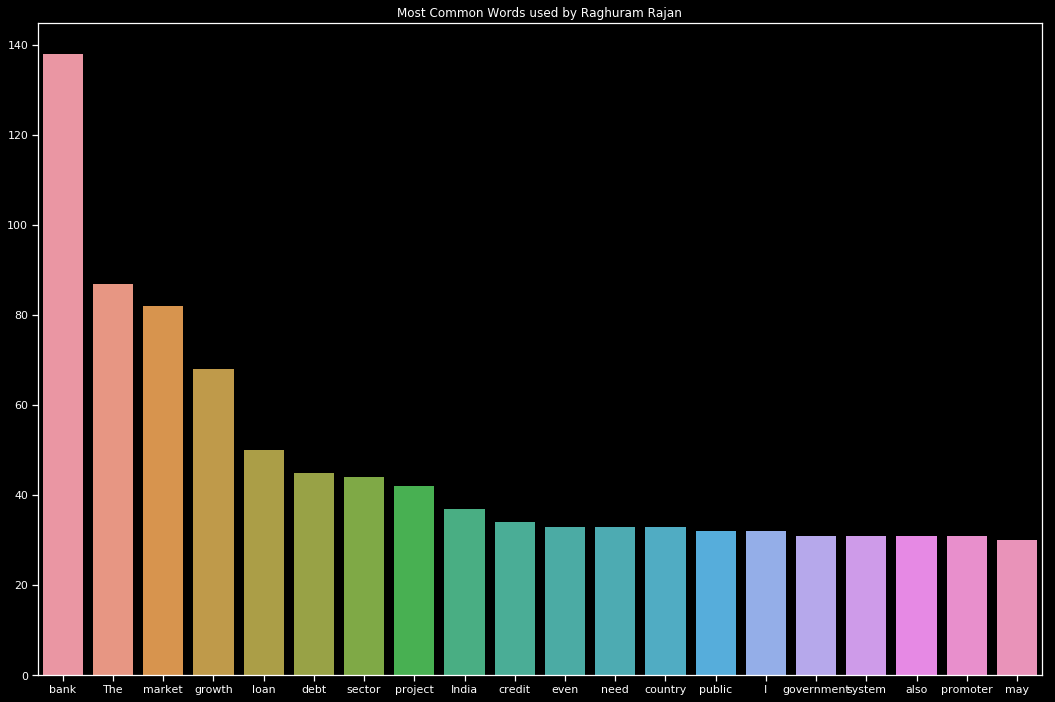

In [49]:
# Plot top 20 most frequently occuring words from Raghuram Rajan
rr_common_words = [word[0] for word in speech_word_counts.most_common(20)]
rr_common_counts = [word[1] for word in speech_word_counts.most_common(20)]

# Using background style
plt.style.use('dark_background')
plt.figure(figsize=(18, 12))

sns.barplot(x=rr_common_words, y=rr_common_counts)
plt.title('Most Common Words used by Raghuram Rajan')
plt.show()

In [50]:
# See count list of most common words
print("25 most common words:\nWord\t\tCount")
for word, count in speech_word_counts.most_common(25):
    print("{}\t\t{}".format(word, count))

25 most common words:
Word		Count
bank		138
The		87
market		82
growth		68
loan		50
debt		45
sector		44
project		42
India		37
credit		34
even		33
need		33
country		33
public		32
I		32
government		31
system		31
also		31
promoter		31
may		30
RBI		29
This		28
make		27
new		26
well		24


### Get Sentiment scores from Raghuram Rajan's speech

In [52]:
# Using TextBlob to get sentiment scores from text
speech_text_object = TextBlob(filtered_speech_words)

# textblob has a pre-trained sentiment analysis model that we can use
speech_text_object.sentiment

Sentiment(polarity=0.0707858826358825, subjectivity=0.4277570775785062)

    TextBlob.sentiment

    Return a tuple(value pair) of form (polarity, subjectivity ) where polarity is a float(number) within the range [-1.0, 1.0] and subjectivity is a float(number) within the range [0.0, 1.0] where 0.0 is very objective and 1.0 is very subjective.

#### What these scores say is that Raghuram Rajan's speech text is fairly subjective (opinionated) but very neutral in polarity (not phrased in a negative or positive way)

### Plot the words by their sentiment from Raghuram Rajan's speech

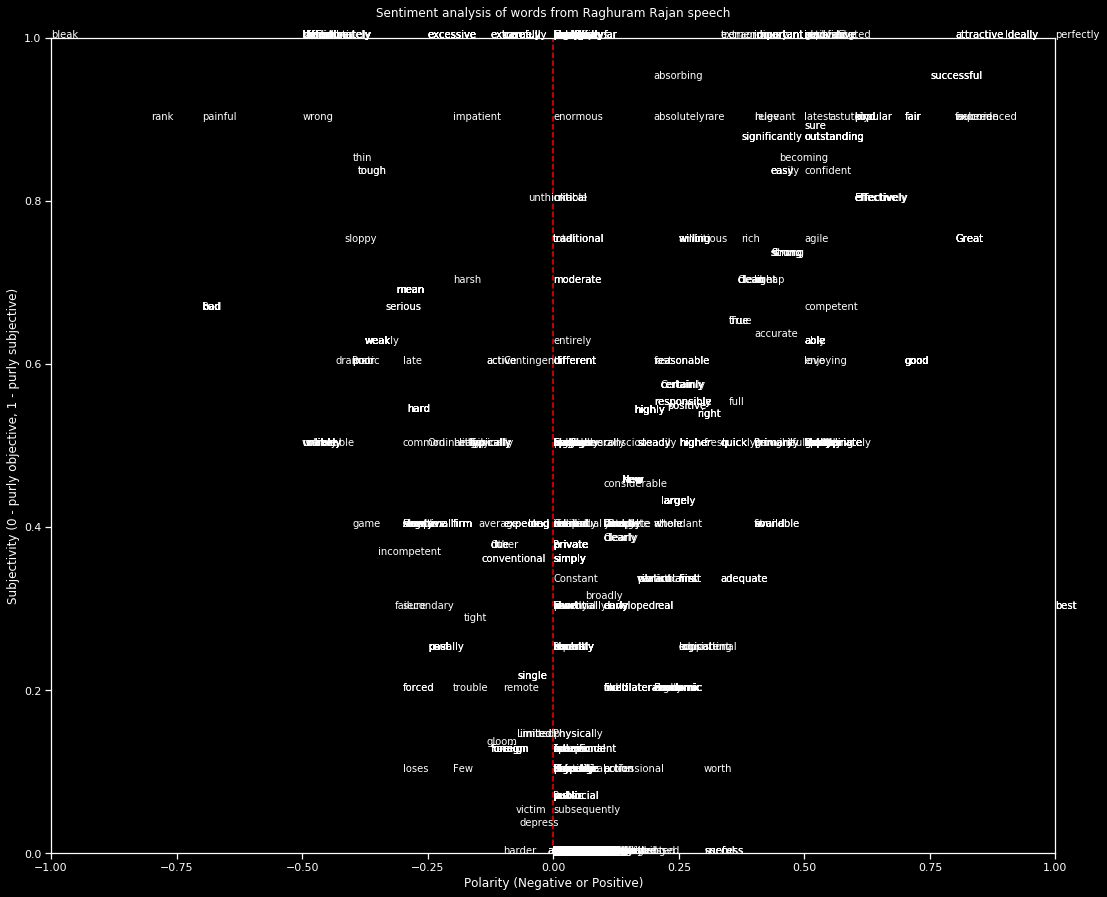

In [61]:
plt.figure(figsize=(18,15))

# for each word draw the text on the char using the sentiment score as the x and y coordinates
for word in lemma_words:
    word_sentiment = TextBlob(word).sentiment
    plt.text(word_sentiment.polarity, # x coordinate
             word_sentiment.subjectivity, # y coordinate
             word) # the text to draw

# set axis ranges 
plt.xlim(-1, 1)
plt.ylim(0, 1)

# draw line in middle
plt.axvline(0, color='red', linestyle='dashed')

# label axis
plt.title('Sentiment analysis of words from Raghuram Rajan speech\n')
plt.xlabel('Polarity (Negative or Positive)')
plt.ylabel('Subjectivity (0 - purly objective, 1 - purly subjective)')

# display
plt.show()

## Thank You.